<a href="https://colab.research.google.com/github/kitiluck/BSC_DPDM23/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Data Preparation and Data Mining

## Members


In [126]:
import io
import pandas as pd
pd.read_csv(io.StringIO('''
1, 643020513-9, นายภัทรธร ก้อนมณี
2, 643020515-5, นายรัชชานนท์ ทิพย์พิมานพร
3, 643020521-0, นายวุฒิชัย คำนา
4, 643021260-7, นางสาวกิติลักษณ์ ลาดโฮม
5, 643021261-5, นางสาวจารุพร การร้อย
6, 643021263-1, นางสาวชนม์ชนก อังคุระษี
7, 643021266-5, นางสาวธิติพร ใจเอื้อ
'''), header=None).rename(columns={0:'ลำดับ', 1:'รหัสนักศึกษา', 2:'ชื่อ-สกุล'})

,ลำดับ,รหัสนักศึกษา,ชื่อ-สกุล
0,1,643020513-9,นายภัทรธร ก้อนมณี
1,2,643020515-5,นายรัชชานนท์ ทิพย์พิมานพร
2,3,643020521-0,นายวุฒิชัย คำนา
3,4,643021260-7,นางสาวกิติลักษณ์ ลาดโฮม
4,5,643021261-5,นางสาวจารุพร การร้อย
5,6,643021263-1,นางสาวชนม์ชนก อังคุระษี
6,7,643021266-5,นางสาวธิติพร ใจเอื้อ


## Import Library

In [127]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

!pip install apyori
from apyori import apriori

## Data Preprocessing

### Import Data

In [128]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [129]:
data_65=pd.read_excel("/content/drive/MyDrive/BSC_DPDM2023/project/accidentmonth.xlsx")
data_64=pd.read_excel("/content/drive/MyDrive/BSC_DPDM2023/project/kh-muul-ubatiehtubnthaangphiess-piingbpramaan-2564-t-kh-63-k-y-64.xlsx")
data_63=pd.read_excel("/content/drive/MyDrive/BSC_DPDM2023/project/kh-muul-ubatiehtubnthaangphiess-piingbpramaan-2563-t-kh-62-k-y-63.xlsx")
data_62=pd.read_excel("/content/drive/MyDrive/BSC_DPDM2023/project/kh-muul-ubatiehtubnthaangphiess-piingbpramaan-2562-t-kh-61-k-y-62.xlsx")
data_61=pd.read_excel("/content/drive/MyDrive/BSC_DPDM2023/project/kh-muul-ubatiehtubnthaangphiess-piingbpramaan-2561-t-kh-60-k-y-61.xlsx")
data_60=pd.read_excel("/content/drive/MyDrive/BSC_DPDM2023/project/kh-muul-ubatiehtubnthaangphiess-piingbpramaan-2560-t-kh-59-k-y-60.xlsx")
data_59=pd.read_excel("/content/drive/MyDrive/BSC_DPDM2023/project/kh-muul-ubatiehtubnthaangphiess-piingbpramaan-2559-t-kh-58-k-y-59.xlsx")
data_more=pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/project/moredata.xlsx')

### Check Missing Values

In [130]:
data_65.isnull().any()

accident_date    False
accident_time    False
expw_step        False
weather_state    False
injur_man        False
injur_femel      False
dead_man         False
dead_femel       False
cause            False
dtype: bool

In [131]:
data_64.isnull().any()

accident_date    False
accident_time    False
step             False
ad_state         False
acman_rec        False
acfem_rec        False
deadman_rec      False
deadfem_rec      False
cause_type       False
dtype: bool

In [132]:
data_63.isnull().any()

accident_date    False
accident_time    False
expw_step        False
weather_state    False
injur_man        False
injur_femel      False
dead_man         False
dead_femel       False
cause            False
dtype: bool

In [133]:
data_62.isnull().any()

accident_date    False
accident_time    False
expw_step        False
weather_state    False
injur_man        False
injur_femel      False
dead_man         False
dead_femel       False
cause            False
dtype: bool

In [134]:
data_61.isnull().any()

accident_date    False
accident_time    False
expw_step        False
weather_state    False
injur_man        False
injur_femel      False
dead_man         False
dead_femel       False
cause            False
dtype: bool

In [135]:
data_60.isnull().any()

accident_date    False
accident_time    False
expw_step        False
weather_state    False
injur_man        False
injur_femel      False
dead_man         False
dead_femel       False
cause            False
dtype: bool

In [136]:
data_59.isnull().any()

accident_date    False
accident_time    False
expw_step        False
weather_state    False
injur_man        False
injur_femel      False
dead_man         False
dead_femel       False
cause            False
dtype: bool

### Concat Dataframe each year (All years: 2559-2565)

#### First Concat
`พบว่า ชื่อ column ในตารางของปีพ.ศ. 2564 ไม่ตรงกับตารางของปีอื่น ๆ`

In [137]:
pd.concat([data_59,data_60,data_61,data_62,data_63,data_64,data_65]).head()

,accident_date,accident_time,expw_step,weather_state,injur_man,injur_femel,dead_man,dead_femel,cause,step,ad_state,acman_rec,acfem_rec,deadman_rec,deadfem_rec,cause_type
0,2016-03-15,07:23:23,ศรีรัช,ปกติ,0.0,0.0,0.0,0.0,โรคประจำตัว,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-07-27,12:22:22,ศรีรัช,ปกติ,0.0,0.0,0.0,0.0,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-12-09,14:40:40,ศรีรัช,ปกติ,0.0,0.0,0.0,0.0,ทำโทรศัพย์หล่นแล้วก้มหยิบ,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-08-20,17:01:01,ศรีรัช,ปกติ,0.0,0.0,0.0,0.0,ก้มหยิบเงิน,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-04-23,09:18:18,ศรีรัช,ปกติ,0.0,0.0,0.0,0.0,บรรทุกหนัก,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
data_59.columns

Index(['accident_date', 'accident_time', 'expw_step', 'weather_state',
       'injur_man', 'injur_femel', 'dead_man', 'dead_femel', 'cause'],
      dtype='object')

In [139]:
data_60.columns

Index(['accident_date', 'accident_time', 'expw_step', 'weather_state',
       'injur_man', 'injur_femel', 'dead_man', 'dead_femel', 'cause'],
      dtype='object')

In [140]:
data_61.columns

Index(['accident_date', 'accident_time', 'expw_step', 'weather_state',
       'injur_man', 'injur_femel', 'dead_man', 'dead_femel', 'cause'],
      dtype='object')

In [141]:
data_62.columns

Index(['accident_date', 'accident_time', 'expw_step', 'weather_state',
       'injur_man', 'injur_femel', 'dead_man', 'dead_femel', 'cause'],
      dtype='object')

In [142]:
data_64.columns

Index(['accident_date', 'accident_time', 'step', 'ad_state', 'acman_rec',
       'acfem_rec', 'deadman_rec', 'deadfem_rec', 'cause_type'],
      dtype='object')

### Cleaning Data


#### เปลี่ยนชื่อ column ในตารางของแต่ละปีให้เหมือนกัน

In [143]:
data_64=data_64.rename(columns = {'step':'expw_step','ad_state':'weather_state','acman_rec':'injur_man','acfem_rec':'injur_femel'
,'deadman_rec':'dead_man','deadfem_rec':'dead_femel','cause_type':'cause'})

In [144]:
use_data=pd.concat([data_59,data_60,data_61,data_62,data_63,data_64,data_65]).reset_index().drop("index",axis=1)

In [145]:
len(use_data)

6557

In [146]:
use_data.to_excel('use_data.xlsx')

In [147]:
use_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6557 entries, 0 to 6556
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   accident_date  6557 non-null   datetime64[ns]
 1   accident_time  6557 non-null   object        
 2   expw_step      6557 non-null   object        
 3   weather_state  6557 non-null   object        
 4   injur_man      6557 non-null   int64         
 5   injur_femel    6557 non-null   int64         
 6   dead_man       6557 non-null   int64         
 7   dead_femel     6557 non-null   int64         
 8   cause          6557 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 461.2+ KB


In [148]:
type(use_data['accident_time'][0])

datetime.time

#### จัดกลุ่มแต่ละเวลาให้แบ่งเป็นช่วงเวลา

In [149]:
import datetime
def time_in_range(start, end, x):
    """Return true if x is in the range [start, end]"""
    if start <= end:
        return start <= x <= end
    else:
        return start <= x or x <= end

In [150]:
#ยกตัวอย่าง
start = datetime.time(6, 1, 0)
end = datetime.time(12, 0, 0)
time_in_range(start, end, use_data['accident_time'][0])

True

In [151]:
use_data['accident_time'][227]

datetime.time(12, 59, 59)

In [152]:
time_lable=[]
how =[]
#เช้า
start_0 = datetime.time(6, 0, 0)
end_0 = datetime.time(11, 59, 59)
#บ่าย
start_1 = datetime.time(12, 0, 0)
end_1 = datetime.time(17, 59, 59)
#ดึก
start_2 = datetime.time(18, 0, 0)
end_2 = datetime.time(23, 59, 59)
#หลังเที่ยงคืน
start_3 = datetime.time(0, 0, 0)
end_3 = datetime.time(5, 59, 59)
for i in range(len(use_data['accident_time'])):
  if time_in_range(start_0, end_0, use_data['accident_time'][i]) == True:
    time_lable.append(0)
  elif time_in_range(start_1, end_1, use_data['accident_time'][i]) == True:
    time_lable.append(1)
  elif time_in_range(start_2, end_2, use_data['accident_time'][i]) == True:
    time_lable.append(2)
  elif time_in_range(start_3, end_3, use_data['accident_time'][i]) == True:
    time_lable.append(3)
  else:
    how.append(i)
how

[]

In [153]:
use_data['time_lable']=time_lable

In [154]:
use_data.head()

,accident_date,accident_time,expw_step,weather_state,injur_man,injur_femel,dead_man,dead_femel,cause,time_lable
0,2016-03-15,07:23:23,ศรีรัช,ปกติ,0,0,0,0,โรคประจำตัว,0
1,2016-07-27,12:22:22,ศรีรัช,ปกติ,0,0,0,0,-,1
2,2015-12-09,14:40:40,ศรีรัช,ปกติ,0,0,0,0,ทำโทรศัพย์หล่นแล้วก้มหยิบ,1
3,2016-08-20,17:01:01,ศรีรัช,ปกติ,0,0,0,0,ก้มหยิบเงิน,1
4,2016-04-23,09:18:18,ศรีรัช,ปกติ,0,0,0,0,บรรทุกหนัก,0


#### แยก วัน/เดือน/ปี ออกจากกัน

##### เเปลง time stamp ที่เป็นฟังก์ชัน `strptime()` ให้เป็น string

In [155]:
cov_time_sti =use_data['accident_date'].apply(lambda x: x.strftime("%Y-%m-%d %H:%M:%S"))
cov_time_sti[0].split()[0].split('-')

['2016', '03', '15']

In [156]:
day=[]
mon=[]
year=[]
for i in range(len(cov_time_sti)):
  L=cov_time_sti[i].split()[0].split('-')
  year.append(L[0])
  mon.append(L[1])
  day.append(L[2])

In [157]:
print(f'count_row_day = {len(day)}')
print(f'count_row_mon = {len(mon)}')
print(f'count_row_yeat = {len(year)}')

count_row_day = 6557
count_row_mon = 6557
count_row_yeat = 6557


#### กำหนดตัวเลข แทน ชื่อถนน

In [158]:
set(use_data['expw_step'])

{'S1',
 'ฉลองรัช',
 'ทางหลวงพิเศษหมายเลข 37',
 'บางพลี-สุขสวัสดิ์',
 'บูรพาวิถี',
 'ศรีรัช',
 'ศรีรัช-วงแหวนรอบนอก',
 'อุดรรัถยา',
 'เฉลิมมหานคร'}

In [159]:
name_road=[]
for i in range(len(use_data['expw_step'])):
  if use_data['expw_step'][i] == 'ศรีรัช':
    name_road.append('0')
  elif use_data['expw_step'][i] == 'ฉลองรัช':
    name_road.append('1')
  elif use_data['expw_step'][i] == 'บูรพาวิถี':
    name_road.append('2')
  elif use_data['expw_step'][i] == 'อุดรรัถยา':
    name_road.append('3')
  elif use_data['expw_step'][i] == 'เฉลิมมหานคร':
    name_road.append('4')
  elif use_data['expw_step'][i] == 'บางพลี-สุขสวัสดิ์':
    name_road.append('5')
  elif use_data['expw_step'][i] == 'ทางหลวงพิเศษหมายเลข 37':
    name_road.append('6')
  elif use_data['expw_step'][i] == 'ศรีรัช-วงแหวนรอบนอก':
    name_road.append('7')
  elif use_data['expw_step'][i] == 'S1':
    name_road.append('8')

In [160]:
len(name_road)

6557

#### กำหนดตัวเลข แทน สภาพอากาศ

In [161]:
set(use_data['weather_state'])

{'กลางคืน',
 'ถนนเปียก',
 'ถนนเปียกรื่น',
 'ถนนเปียกลื่น',
 'ท้องฟ้ามืดครึ้ม',
 'ปกติ',
 'ฝนตก',
 'ฝนตกลมแรง'}

In [162]:
weather_road=[]
for i in range(len(use_data['weather_state'])):
  if use_data['weather_state'][i] == 'ปกติ':
    weather_road.append('0')
  elif (use_data['weather_state'][i] == 'ฝนตก') | (use_data['weather_state'][i] == 'ท้องฟ้ามืดครึ้ม') |(use_data['weather_state'][i] == 'ฝนตกลมแรง'):
    weather_road.append('1')
  elif use_data['weather_state'][i] == 'กลางคืน':
    weather_road.append('2')
  elif (use_data['weather_state'][i] == 'ถนนเปียกรื่น') |(use_data['weather_state'][i] == 'ถนนเปียกลื่น')|(use_data['weather_state'][i] == 'ถนนเปียก') :
    weather_road.append('3')
  else:
    print(i)

In [163]:
len(weather_road)

6557

#### กำหนดตัวเลข แทน ผู้บาดเจ็บ และผู้เสียชีวิต

In [164]:
injur =[]
for i in range(len(use_data['injur_man'])):
  if (use_data['injur_man'][i] == 0 ) and (use_data['injur_femel'][i] == 0):
    injur.append('0')
  elif (use_data['injur_man'][i] > 0) and (use_data['injur_femel'][i] == 0):
    injur.append('1')
  elif (use_data['injur_man'][i] == 0) and (use_data['injur_femel'][i] > 0):
    injur.append('2')
  elif (use_data['injur_man'][i] > 0) and (use_data['injur_femel'][i] > 0):
    injur.append('3')

In [165]:
len(injur)

6557

In [166]:
dead =[]
for i in range(len(use_data['dead_man'])):
  if (use_data['dead_man'][i] == 0 ) and (use_data['dead_femel'][i] == 0):
    dead.append('0')
  elif (use_data['dead_man'][i] > 0) or (use_data['dead_femel'][i] > 0):
    dead.append('1')

In [167]:
len(dead)

6557

In [168]:
data_more['cause_A'][1]

0

### Group Data
`จัดกลุ่มข้อมูลสาเหตุของการเกิดอุบัติเหตู เพื่อนำไปทำ Association Rules เเละ Decision Tree`

In [169]:
new1 = data_more[['cause_A','cause_D']].replace(0,np.nan)

In [170]:
newk = []
for i in range(len(new1['cause_D'])):
  if (new1['cause_D'][i] == 'เกิดจากตนเอง' ) :
    newk.append('0')
  elif (new1['cause_D'][i] == 'เกิดจากคนอื่น' ) :
    newk.append('1')
  elif (new1['cause_D'][i] == 'เกิดจากสภาพเเวดล้อมเเละรถ' ) :
    newk.append('2')
  else:
    newk.append(np.nan)

In [171]:
data_association_rules = []
for i in range(len(data_more['cause_A'])):
  x = new1['cause_A'][i]
  data_association_rules.append(x)

### Create New Dataframe
สร้างตารางใหม่

In [172]:
data_newer = {'day':day, 'month' : mon, 'year' : year, 'time':time_lable, 'road':name_road, 'weather':weather_road,'injur':injur,'cause_A':data_association_rules,'cause_D':newk,'dead':dead}
data_new = pd.DataFrame(data_newer)

In [173]:
data_new = data_new.dropna()

In [174]:
data_new.to_excel('use_data.xlsx')

In [175]:
data_new

,day,month,year,time,road,weather,injur,cause_A,cause_D,dead
0,15,03,2016,0,0,0,0,โรคประจำตัว,0,0
2,09,12,2015,1,0,0,0,ก้มเก็บของ,0,0
3,20,08,2016,1,0,0,0,ก้มเก็บของ,0,0
4,23,04,2016,0,0,0,0,บรรทุกเกิน,0,0
5,17,09,2016,0,0,0,3,เบรครถกระทันหัน,1,0
...,...,...,...,...,...,...,...,...,...,...
6552,04,10,2021,1,2,0,1,สาเหตุจากสภาพรถ/ถนน,2,0
6553,03,10,2021,0,5,0,1,ขับรถประมาท,0,0
6554,03,10,2021,2,7,1,0,ขับรถเร็วเกินไป,0,0
6555,01,10,2021,0,0,0,0,สาเหตุจากสภาพรถ/ถนน,2,0


## Data Mining

### Association Rules

#### ช่วงเช้า (06:00 - 12:59 น.)

In [176]:
data_morning = data_new[data_new["time"]== 0]
data_morning #data ที่เป็นเฉพาะของช่วงเช้า

,day,month,year,time,road,weather,injur,cause_A,cause_D,dead
0,15,03,2016,0,0,0,0,โรคประจำตัว,0,0
4,23,04,2016,0,0,0,0,บรรทุกเกิน,0,0
5,17,09,2016,0,0,0,3,เบรครถกระทันหัน,1,0
21,31,01,2016,0,4,0,0,เฉี่ยวชน,1,0
24,04,02,2016,0,5,0,1,ขับขี่ย้อนศร,0,0
...,...,...,...,...,...,...,...,...,...,...
6549,05,10,2021,0,2,0,1,ขับรถเร็วเกินไป,0,0
6550,05,10,2021,0,2,0,0,ขับรถเร็วเกินไป,0,0
6551,05,10,2021,0,6,0,1,เปลี่ยนช่องทางกระทันหัน,0,0
6553,03,10,2021,0,5,0,1,ขับรถประมาท,0,0


##### ในช่วงเช้าของแต่ละเดือน มักเกิดอุบัติเหตุจากสาเหตุ?

In [177]:
data_morning.groupby(['month']).sum()

<ipython-input-177-075552398338>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_morning.groupby(['month']).sum()


,time
month,
01,0
02,0
03,0
04,0
05,0
06,0
07,0
08,0
09,0


In [178]:
data_morning.isnull().any()

day        False
month      False
year       False
time       False
road       False
weather    False
injur      False
cause_A    False
cause_D    False
dead       False
dtype: bool

In [179]:
data_morning.groupby('month')['cause_A'].apply(list)

month
01    [เฉี่ยวชน, หลับใน, ขับรถเร็วเกินไป, ขับรถเร็วเ...
02    [ขับขี่ย้อนศร, การทำงานของราชการ, ขับรถเร็วเกิ...
03    [โรคประจำตัว, ขับรถเร็วเกินไป, ขับรถเร็วเกินไป...
04    [บรรทุกเกิน, ขับรถเร็วเกินไป, ขับรถเร็วเกินไป,...
05    [หลับใน, ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับ...
06    [สาเหตุจากสภาพรถ/ถนน, เข้าผิดช่อง, ขับรถเร็วเก...
07    [ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับรถเร็วเก...
08    [หลับใน, ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับ...
09    [เบรครถกระทันหัน, ขับรถประมาท, หลับใน, ขับรถช้...
10    [ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับรถเร็วเก...
11    [ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับรถเร็วเก...
12    [ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับรถเร็วเก...
Name: cause_A, dtype: object

In [180]:
data_mor = data_morning.groupby(['month'])['cause_A'].apply(list).reset_index()
trans_data_morning = data_mor['cause_A'].apply(lambda x: [str(item) for item in x])
trans_data_morning

0     [เฉี่ยวชน, หลับใน, ขับรถเร็วเกินไป, ขับรถเร็วเ...
1     [ขับขี่ย้อนศร, การทำงานของราชการ, ขับรถเร็วเกิ...
2     [โรคประจำตัว, ขับรถเร็วเกินไป, ขับรถเร็วเกินไป...
3     [บรรทุกเกิน, ขับรถเร็วเกินไป, ขับรถเร็วเกินไป,...
4     [หลับใน, ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับ...
5     [สาเหตุจากสภาพรถ/ถนน, เข้าผิดช่อง, ขับรถเร็วเก...
6     [ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับรถเร็วเก...
7     [หลับใน, ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับ...
8     [เบรครถกระทันหัน, ขับรถประมาท, หลับใน, ขับรถช้...
9     [ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับรถเร็วเก...
10    [ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับรถเร็วเก...
11    [ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับรถเร็วเก...
Name: cause_A, dtype: object

###### สิ่งที่ทุกเดือนต้องพบเจอ

In [181]:
min_sup = 0.99

sup_data_morning = list(apriori(trans_data_morning, min_support = min_sup))
for i in sup_data_morning:
    if i[0].__len__()>5:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({'ขับรถประมาท', 'ฝ่าฝืนกฎจราจร', 'ขับรถกระชั้นชิด', 'ขับรถเร็วเกินไป', 'เปลี่ยนช่องทางกระทันหัน', 'สาเหตุจากสภาพรถ/ถนน'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'เปลี่ยนช่องทางกระทันหัน', 'สาเหตุจากสภาพรถ/ถนน', 'ขับรถประมาท', 'ฝ่าฝืนกฎจราจร', 'ขับรถกระชั้นชิด', 'ขับรถเร็วเกินไป'}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({'ขับรถกระชั้นชิด'}), items_add=frozenset({'ขับรถประมาท', 'ฝ่าฝืนกฎจราจร', 'เปลี่ยนช่องทางกระทันหัน', 'ขับรถเร็วเกินไป', 'สาเหตุจากสภาพรถ/ถนน'}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({'ขับรถประมาท'}), items_add=frozenset({'ฝ่าฝืนกฎจราจร', 'ขับรถกระชั้นชิด', 'เปลี่ยนช่องทางกระทันหัน', 'ขับรถเร็วเกินไป', 'สาเหตุจากสภาพรถ/ถนน'}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({'ขับรถเร็วเกินไป'}), items_add=frozenset({'ขับรถประมาท', 'ฝ่าฝืนกฎจราจร', 'ขับรถกระชั้นชิด', 'เปลี่ยนช่องทางกระทันหัน', 'สาเหตุจากสภาพรถ/

######สิ่งที่บางเดือนต้องพบเจอ (หาตัวที่ค่า lift > 1)

In [182]:
min_sup = 0.6
min_lifts = 1.1
sup_data_morning = list(apriori(trans_data_morning, min_support = min_sup, min_lift=min_lifts))
for i in sup_data_morning:
    if i[0].__len__()>8:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({'ขับรถประมาท', 'ฝ่าฝืนกฎจราจร', 'ขับรถกระชั้นชิด', 'ขับรถเร็วเกินไป', 'เบรครถกระทันหัน', 'บรรทุกเกิน', 'สาเหตุจากสภาพรถ/ถนน', 'เปลี่ยนช่องทางกระทันหัน', 'หลับใน                        '}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset({'บรรทุกเกิน'}), items_add=frozenset({'ขับรถประมาท', 'ฝ่าฝืนกฎจราจร', 'ขับรถกระชั้นชิด', 'ขับรถเร็วเกินไป', 'เบรครถกระทันหัน', 'สาเหตุจากสภาพรถ/ถนน', 'เปลี่ยนช่องทางกระทันหัน', 'หลับใน                        '}), confidence=0.8888888888888888, lift=1.1851851851851851), OrderedStatistic(items_base=frozenset({'หลับใน                        '}), items_add=frozenset({'ขับรถประมาท', 'ฝ่าฝืนกฎจราจร', 'ขับรถกระชั้นชิด', 'ขับรถเร็วเกินไป', 'เบรครถกระทันหัน', 'บรรทุกเกิน', 'สาเหตุจากสภาพรถ/ถนน', 'เปลี่ยนช่องทางกระทันหัน'}), confidence=0.7999999999999999, lift=1.2), OrderedStatistic(items_base=frozenset({'เบรครถกระทันหัน'}), items_add=frozenset({'ขับรถประมาท', 'ฝ่าฝืนกฎจราจร', 'ขับรถกระชั้น

##### ในช่วงเช้าของแต่ละถนน มักเกิดอุบัติเหตุจากสาเหตุ?

In [183]:
data_morning.groupby(['road']).sum()

<ipython-input-183-6d11a940d890>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_morning.groupby(['road']).sum()


,time
road,
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0


In [184]:
data_morning.isnull().any()

day        False
month      False
year       False
time       False
road       False
weather    False
injur      False
cause_A    False
cause_D    False
dead       False
dtype: bool

In [185]:
data_morning.groupby('road')['cause_A'].apply(list)

road
0    [โรคประจำตัว, บรรทุกเกิน, เบรครถกระทันหัน, ขับ...
1    [ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับรถเร็วเก...
2    [ขับรถประมาท, หลับใน, หลับใน, ขับรถเร็วเกินไป,...
3    [หลับใน, ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับ...
4    [เฉี่ยวชน, ขับรถช้าเกินไป, ขับรถเร็วเกินไป, ขั...
5    [ขับขี่ย้อนศร, สาเหตุจากสภาพรถ/ถนน, การทำงานขอ...
6    [เข้าผิดช่อง, ขับรถเร็วเกินไป, ขับรถเร็วเกินไป...
7    [หลับใน, ขับรถเร็วเกินไป, สาเหตุจากสภาพรถ/ถนน,...
8    [ขับรถเร็วเกินไป, เปลี่ยนช่องทางกระทันหัน, สาเ...
Name: cause_A, dtype: object

In [186]:
data_morn = data_morning.groupby(['road'])['cause_A'].apply(list).reset_index()
trans_data_morn = data_morn['cause_A'].apply(lambda x: [str(item) for item in x])
trans_data_morn

0    [โรคประจำตัว, บรรทุกเกิน, เบรครถกระทันหัน, ขับ...
1    [ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับรถเร็วเก...
2    [ขับรถประมาท, หลับใน, หลับใน, ขับรถเร็วเกินไป,...
3    [หลับใน, ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับ...
4    [เฉี่ยวชน, ขับรถช้าเกินไป, ขับรถเร็วเกินไป, ขั...
5    [ขับขี่ย้อนศร, สาเหตุจากสภาพรถ/ถนน, การทำงานขอ...
6    [เข้าผิดช่อง, ขับรถเร็วเกินไป, ขับรถเร็วเกินไป...
7    [หลับใน, ขับรถเร็วเกินไป, สาเหตุจากสภาพรถ/ถนน,...
8    [ขับรถเร็วเกินไป, เปลี่ยนช่องทางกระทันหัน, สาเ...
Name: cause_A, dtype: object

###### สิ่งที่ทุกถนนต้องพบเจอ

In [187]:
min_sup = 0.99

sup_data_morn = list(apriori(trans_data_morn, min_support = min_sup))
for i in sup_data_morn:
    if i[0].__len__()>2:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({'สาเหตุจากสภาพรถ/ถนน', 'ขับรถเร็วเกินไป', 'เปลี่ยนช่องทางกระทันหัน'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'สาเหตุจากสภาพรถ/ถนน', 'ขับรถเร็วเกินไป', 'เปลี่ยนช่องทางกระทันหัน'}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({'ขับรถเร็วเกินไป'}), items_add=frozenset({'สาเหตุจากสภาพรถ/ถนน', 'เปลี่ยนช่องทางกระทันหัน'}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({'สาเหตุจากสภาพรถ/ถนน'}), items_add=frozenset({'เปลี่ยนช่องทางกระทันหัน', 'ขับรถเร็วเกินไป'}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({'เปลี่ยนช่องทางกระทันหัน'}), items_add=frozenset({'สาเหตุจากสภาพรถ/ถนน', 'ขับรถเร็วเกินไป'}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({'สาเหตุจากสภาพรถ/ถนน', 'ขับรถเร็วเกินไป'}), items_add=frozenset({'เปลี่ยนช่องทางกระทันหัน'}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({'เปลี่ยนช่องทางกระทัน

######สิ่งที่บางถนนต้องพบเจอ (หาตัวที่ค่า lift > 1)

In [188]:
min_sup = 0.7
min_lifts = 1.1
sup_data_morn = list(apriori(trans_data_morn, min_support = min_sup, min_lift= min_lifts))
for i in sup_data_morn:
    if i[0].__len__()>5:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({'ขับรถประมาท', 'ขับรถกระชั้นชิด', 'ขับรถเร็วเกินไป', 'เปลี่ยนช่องทางกระทันหัน', 'บรรทุกเกิน', 'สาเหตุจากสภาพรถ/ถนน'}), support=0.7777777777777778, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ขับรถกระชั้นชิด'}), items_add=frozenset({'ขับรถประมาท', 'เปลี่ยนช่องทางกระทันหัน', 'ขับรถเร็วเกินไป', 'บรรทุกเกิน', 'สาเหตุจากสภาพรถ/ถนน'}), confidence=1.0, lift=1.2857142857142856), OrderedStatistic(items_base=frozenset({'ขับรถประมาท'}), items_add=frozenset({'ขับรถกระชั้นชิด', 'เปลี่ยนช่องทางกระทันหัน', 'ขับรถเร็วเกินไป', 'บรรทุกเกิน', 'สาเหตุจากสภาพรถ/ถนน'}), confidence=1.0, lift=1.2857142857142856), OrderedStatistic(items_base=frozenset({'บรรทุกเกิน'}), items_add=frozenset({'ขับรถประมาท', 'ขับรถกระชั้นชิด', 'เปลี่ยนช่องทางกระทันหัน', 'ขับรถเร็วเกินไป', 'สาเหตุจากสภาพรถ/ถนน'}), confidence=1.0, lift=1.2857142857142856), OrderedStatistic(items_base=frozenset({'ขับรถประมาท', 'ขับรถกระชั้นชิด'}), items_add=frozenset({'เปลี่ยนช่องทางกระทันหัน', 'ขับร

#เพิ่มเติมถ้าเรานำ เดือนกับชื่อถนนมาจัดกลุ่มด้วยกัน

In [189]:
data_new.groupby(['month']).sum()

<ipython-input-189-3d2da5921d2c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_new.groupby(['month']).sum()


,time
month,
01,637
02,748
03,790
04,645
05,720
06,791
07,789
08,658
09,733


In [190]:
data_new.groupby('month')['cause_A'].apply(list)

month
01    [ขับรถประมาท, ขับรถเร็วเกินไป, เฉี่ยวชน, มึนเม...
02    [โรคประจำตัว, ก้มเก็บของ, โรคประจำตัว, ขับขี่ย...
03    [โรคประจำตัว, มึนเมา, หลับใน, หลับใน, ขับรถเร็...
04    [บรรทุกเกิน, ก้มเก็บของ, ก้มเก็บของ, มึนเมา, ห...
05    [หลับใน, หลับใน, หลับใน, หลับใน, หลับใน, ขับรถ...
06    [โรคประจำตัว, ขับขี่ย้อนศร, สาเหตุจากสภาพรถ/ถน...
07    [หลบรถ, ขับขี่ย้อนศร, ขับรถประมาท, หลับใน, หลั...
08    [ก้มเก็บของ, ถอยรถ, ขับขี่ย้อนศร, ถอยรถ, ก้มเก...
09    [เบรครถกระทันหัน, ขับรถประมาท, ขับรถประมาท, ขั...
10    [ขับรถประมาท, ขับรถประมาท, มึนเมา, มึนเมา, หลั...
11    [บรรทุกเกิน, มึนเมา, หลับใน, ขับรถช้าเกินไป, ข...
12    [ก้มเก็บของ, ขับรถประมาท, หลับใน, หลับใน, หลับ...
Name: cause_A, dtype: object

In [191]:
data_MC = data_new.groupby(['road','month'])['cause_A'].apply(list).reset_index()
trans_data_MC = data_MC['cause_A'].apply(lambda x: [str(item) for item in x])
trans_data_MC

0      [ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับรถเร็วเก...
1      [ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับรถเร็วเก...
2      [โรคประจำตัว, ขับรถเร็วเกินไป, ขับรถเร็วเกินไป...
3      [บรรทุกเกิน, หลับใน, ขับรถเร็วเกินไป, ขับรถเร็...
4      [หลับใน, หลับใน, ขับรถเร็วเกินไป, ขับรถเร็วเกิ...
                             ...                        
102                                [สาเหตุจากสภาพรถ/ถนน]
103    [เปลี่ยนช่องทางกระทันหัน, ขับรถเร็วเกินไป, ขับ...
104    [หลับใน, สาเหตุจากสภาพรถ/ถนน, สาเหตุจากสภาพรถ/...
105    [ขับรถเร็วเกินไป, สาเหตุจากสภาพรถ/ถนน, ขับรถเร...
106    [ขับรถเร็วเกินไป, สาเหตุจากสภาพรถ/ถนน, สาเหตุจ...
Name: cause_A, Length: 107, dtype: object

In [192]:
min_sup = 0.5

sup_data_MC = list(apriori(trans_data_MC, min_support = min_sup))
for i in sup_data_MC:
    if i[0].__len__()>7:
        print('yes')
        print(i)

#### ช่วงบ่าย (12:00-17:59 น.)

##### ในช่วงบ่ายของแต่ละเดือน มักเกิดอุบัติเหตุจากสาเหตุ?

In [193]:
data_afternoon=data_new[data_new["time"]==1]
data_afternoon #data ของ ช่วงเวลา บ่าย -> บ่าย

,day,month,year,time,road,weather,injur,cause_A,cause_D,dead
2,09,12,2015,1,0,0,0,ก้มเก็บของ,0,0
3,20,08,2016,1,0,0,0,ก้มเก็บของ,0,0
8,04,08,2016,1,1,0,0,ถอยรถ,0,0
14,12,02,2016,1,3,0,0,ก้มเก็บของ,0,0
15,02,09,2016,1,3,0,0,ขับรถประมาท,0,0
...,...,...,...,...,...,...,...,...,...,...
6543,10,10,2021,1,1,0,0,สาเหตุจากสภาพรถ/ถนน,2,0
6546,09,10,2021,1,5,0,0,สาเหตุจากสภาพรถ/ถนน,2,0
6547,08,10,2021,1,4,0,0,ขับรถกระชั้นชิด,0,0
6552,04,10,2021,1,2,0,1,สาเหตุจากสภาพรถ/ถนน,2,0


In [194]:
data_afternoon.groupby(['month']).sum()

<ipython-input-194-ff5e49d66807>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_afternoon.groupby(['month']).sum()


,time
month,
01,111
02,150
03,170
04,157
05,159
06,148
07,142
08,124
09,137


In [195]:
data_afternoon.isnull().any()

day        False
month      False
year       False
time       False
road       False
weather    False
injur      False
cause_A    False
cause_D    False
dead       False
dtype: bool

In [196]:
data_afternoon.groupby('month')['cause_A'].apply(list)

month
01    [หลับใน, ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับ...
02    [ก้มเก็บของ, โรคประจำตัว, ขับรถเร็วเกินไป, ขับ...
03    [ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับรถเร็วเก...
04    [หลับใน, ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับ...
05    [หลับใน, ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับ...
06    [หลับใน, ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับ...
07    [หลับใน, ขับรถช้าเกินไป, ขับรถเร็วเกินไป, ขับร...
08    [ก้มเก็บของ, ถอยรถ, ถอยรถ, ก้มเก็บของ, ขับรถเร...
09    [ขับรถประมาท, ขับรถประมาท, มึนเมา, หลับใน, ขับ...
10    [ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับรถเร็วเก...
11    [บรรทุกเกิน, หลับใน, ขับรถเร็วเกินไป, ขับรถเร็...
12    [ก้มเก็บของ, หลับใน, หลับใน, ขับรถเร็วเกินไป, ...
Name: cause_A, dtype: object

In [197]:
data_mc_afternoon = data_afternoon.groupby(['month'])['cause_A'].apply(list).reset_index()
trans_mc_afternoon= data_mc_afternoon['cause_A'].apply(lambda x: [str(item) for item in x])
trans_mc_afternoon

0     [หลับใน, ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับ...
1     [ก้มเก็บของ, โรคประจำตัว, ขับรถเร็วเกินไป, ขับ...
2     [ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับรถเร็วเก...
3     [หลับใน, ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับ...
4     [หลับใน, ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับ...
5     [หลับใน, ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับ...
6     [หลับใน, ขับรถช้าเกินไป, ขับรถเร็วเกินไป, ขับร...
7     [ก้มเก็บของ, ถอยรถ, ถอยรถ, ก้มเก็บของ, ขับรถเร...
8     [ขับรถประมาท, ขับรถประมาท, มึนเมา, หลับใน, ขับ...
9     [ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับรถเร็วเก...
10    [บรรทุกเกิน, หลับใน, ขับรถเร็วเกินไป, ขับรถเร็...
11    [ก้มเก็บของ, หลับใน, หลับใน, ขับรถเร็วเกินไป, ...
Name: cause_A, dtype: object

###### สิ่งที่ทุกเดือนต้องพบเจอ

In [198]:
min_sup = 1

sup_mc_afternoon = list(apriori(trans_mc_afternoon, min_support = min_sup))
for i in sup_mc_afternoon:
    if i[0].__len__()>4:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({'ฝ่าฝืนกฎจราจร', 'ขับรถเร็วเกินไป', 'เปลี่ยนช่องทางกระทันหัน', 'สาเหตุจากสภาพรถ/ถนน', 'หลับใน'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'เปลี่ยนช่องทางกระทันหัน', 'สาเหตุจากสภาพรถ/ถนน', 'ฝ่าฝืนกฎจราจร', 'หลับใน', 'ขับรถเร็วเกินไป'}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({'ขับรถเร็วเกินไป'}), items_add=frozenset({'สาเหตุจากสภาพรถ/ถนน', 'หลับใน', 'ฝ่าฝืนกฎจราจร', 'เปลี่ยนช่องทางกระทันหัน'}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({'ฝ่าฝืนกฎจราจร'}), items_add=frozenset({'เปลี่ยนช่องทางกระทันหัน', 'หลับใน', 'ขับรถเร็วเกินไป', 'สาเหตุจากสภาพรถ/ถนน'}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({'สาเหตุจากสภาพรถ/ถนน'}), items_add=frozenset({'เปลี่ยนช่องทางกระทันหัน', 'หลับใน', 'ฝ่าฝืนกฎจราจร', 'ขับรถเร็วเกินไป'}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({'หลับใน'}), items_add=frozenset({'เปลี่ยนช่องท

######สิ่งที่บางเดือนต้องพบเจอ (หาตัวที่ค่า lift > 1)

In [199]:
min_sup = 0.4
min_lifts = 1.1
sup_mc_afternoon = list(apriori(trans_mc_afternoon, min_support = min_sup,min_lift = min_lifts))
for i in sup_mc_afternoon:
    if i[0].__len__()>7:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({'ขับรถประมาท', 'ฝ่าฝืนกฎจราจร', 'เข้าผิดช่อง', 'ขับรถกระชั้นชิด', 'ขับรถเร็วเกินไป', 'เปลี่ยนช่องทางกระทันหัน', 'สาเหตุจากสภาพรถ/ถนน', 'หลับใน'}), support=0.4166666666666667, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ขับรถกระชั้นชิด'}), items_add=frozenset({'ขับรถประมาท', 'ฝ่าฝืนกฎจราจร', 'เข้าผิดช่อง', 'ขับรถเร็วเกินไป', 'เปลี่ยนช่องทางกระทันหัน', 'สาเหตุจากสภาพรถ/ถนน', 'หลับใน'}), confidence=0.5, lift=1.2), OrderedStatistic(items_base=frozenset({'ขับรถประมาท'}), items_add=frozenset({'ฝ่าฝืนกฎจราจร', 'เข้าผิดช่อง', 'ขับรถกระชั้นชิด', 'ขับรถเร็วเกินไป', 'เปลี่ยนช่องทางกระทันหัน', 'สาเหตุจากสภาพรถ/ถนน', 'หลับใน'}), confidence=0.5, lift=1.2), OrderedStatistic(items_base=frozenset({'เข้าผิดช่อง'}), items_add=frozenset({'ขับรถประมาท', 'ฝ่าฝืนกฎจราจร', 'ขับรถกระชั้นชิด', 'ขับรถเร็วเกินไป', 'เปลี่ยนช่องทางกระทันหัน', 'สาเหตุจากสภาพรถ/ถนน', 'หลับใน'}), confidence=0.8333333333333334, lift=1.1111111111111112), OrderedStatistic(items_base=fro

##### ในช่วงบ่ายของแต่ละถนน มักเกิดอุบัติเหตุจากสาเหตุ?

In [200]:
data_afternoon0 =data_new[data_new["time"]==1]
data_afternoon0 #data ของ ช่วงเวลา บ่าย -> บ่าย

,day,month,year,time,road,weather,injur,cause_A,cause_D,dead
2,09,12,2015,1,0,0,0,ก้มเก็บของ,0,0
3,20,08,2016,1,0,0,0,ก้มเก็บของ,0,0
8,04,08,2016,1,1,0,0,ถอยรถ,0,0
14,12,02,2016,1,3,0,0,ก้มเก็บของ,0,0
15,02,09,2016,1,3,0,0,ขับรถประมาท,0,0
...,...,...,...,...,...,...,...,...,...,...
6543,10,10,2021,1,1,0,0,สาเหตุจากสภาพรถ/ถนน,2,0
6546,09,10,2021,1,5,0,0,สาเหตุจากสภาพรถ/ถนน,2,0
6547,08,10,2021,1,4,0,0,ขับรถกระชั้นชิด,0,0
6552,04,10,2021,1,2,0,1,สาเหตุจากสภาพรถ/ถนน,2,0


In [201]:
data_afternoon0.groupby(['road']).sum()

<ipython-input-201-74b2cb010c69>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_afternoon0.groupby(['road']).sum()


,time
road,
0,399
1,170
2,290
3,110
4,217
5,355
6,173
7,49
8,9


In [202]:
data_afternoon0.isnull().any()

day        False
month      False
year       False
time       False
road       False
weather    False
injur      False
cause_A    False
cause_D    False
dead       False
dtype: bool

In [203]:
data_afternoon0.groupby('road')['cause_A'].apply(list)

road
0    [ก้มเก็บของ, ก้มเก็บของ, หลับใน, ขับรถเร็วเกิน...
1    [ถอยรถ, มึนเมา, ขับรถเร็วเกินไป, ขับรถเร็วเกิน...
2    [หลับใน, ขับรถช้าเกินไป, ขับรถเร็วเกินไป, ขับร...
3    [ก้มเก็บของ, ขับรถประมาท, หลับใน, หลับใน, หลับ...
4    [ขับรถประมาท, โรคประจำตัว, บรรทุกเกิน, ขับรถเร...
5    [ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับรถเร็วเก...
6    [ถอยรถ, ก้มเก็บของ, หลับใน, หลับใน, ขับรถเร็วเ...
7    [ก้มเก็บของ, เสียหลัก, ขับรถเร็วเกินไป, ขับรถเ...
8    [ขับรถเร็วเกินไป, สาเหตุจากสภาพรถ/ถนน, สาเหตุจ...
Name: cause_A, dtype: object

In [204]:
data_rc_afternoon = data_afternoon0.groupby(['road'])['cause_A'].apply(list).reset_index()
trans_rc_afternoon = data_rc_afternoon['cause_A'].apply(lambda x: [str(item) for item in x])
trans_rc_afternoon

0    [ก้มเก็บของ, ก้มเก็บของ, หลับใน, ขับรถเร็วเกิน...
1    [ถอยรถ, มึนเมา, ขับรถเร็วเกินไป, ขับรถเร็วเกิน...
2    [หลับใน, ขับรถช้าเกินไป, ขับรถเร็วเกินไป, ขับร...
3    [ก้มเก็บของ, ขับรถประมาท, หลับใน, หลับใน, หลับ...
4    [ขับรถประมาท, โรคประจำตัว, บรรทุกเกิน, ขับรถเร...
5    [ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับรถเร็วเก...
6    [ถอยรถ, ก้มเก็บของ, หลับใน, หลับใน, ขับรถเร็วเ...
7    [ก้มเก็บของ, เสียหลัก, ขับรถเร็วเกินไป, ขับรถเ...
8    [ขับรถเร็วเกินไป, สาเหตุจากสภาพรถ/ถนน, สาเหตุจ...
Name: cause_A, dtype: object

###### สิ่งที่ทุกถนนต้องพบเจอ

In [205]:
min_sup = 0.99

sup_rc_afternoon = list(apriori(trans_rc_afternoon, min_support = min_sup))
for i in sup_rc_afternoon:
    if i[0].__len__()>1:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({'สาเหตุจากสภาพรถ/ถนน', 'ขับรถเร็วเกินไป'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'สาเหตุจากสภาพรถ/ถนน', 'ขับรถเร็วเกินไป'}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({'ขับรถเร็วเกินไป'}), items_add=frozenset({'สาเหตุจากสภาพรถ/ถนน'}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({'สาเหตุจากสภาพรถ/ถนน'}), items_add=frozenset({'ขับรถเร็วเกินไป'}), confidence=1.0, lift=1.0)])
yes
RelationRecord(items=frozenset({'เปลี่ยนช่องทางกระทันหัน', 'ขับรถเร็วเกินไป'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'ขับรถเร็วเกินไป', 'เปลี่ยนช่องทางกระทันหัน'}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({'ขับรถเร็วเกินไป'}), items_add=frozenset({'เปลี่ยนช่องทางกระทันหัน'}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({'เปลี่ยนช่องทางกระทันหัน'}), items_add=frozenset({'ขับรถเ

######สิ่งที่บางถนนต้องพบเจอ (หาตัวที่ค่า lift > 1)

In [206]:
min_sup = 0.7
min_lifts = 1.1
sup_rc_afternoon = list(apriori(trans_rc_afternoon, min_support = min_sup, min_lift=min_lifts ))
for i in sup_rc_afternoon:
    if i[0].__len__()>5:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({'ขับรถประมาท', 'ขับรถเร็วเกินไป', 'เบรครถกระทันหัน', 'เปลี่ยนช่องทางกระทันหัน', 'สาเหตุจากสภาพรถ/ถนน', 'หลับใน'}), support=0.7777777777777778, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ขับรถประมาท'}), items_add=frozenset({'เปลี่ยนช่องทางกระทันหัน', 'ขับรถเร็วเกินไป', 'เบรครถกระทันหัน', 'สาเหตุจากสภาพรถ/ถนน', 'หลับใน'}), confidence=1.0, lift=1.2857142857142856), OrderedStatistic(items_base=frozenset({'หลับใน'}), items_add=frozenset({'ขับรถประมาท', 'เปลี่ยนช่องทางกระทันหัน', 'ขับรถเร็วเกินไป', 'เบรครถกระทันหัน', 'สาเหตุจากสภาพรถ/ถนน'}), confidence=1.0, lift=1.2857142857142856), OrderedStatistic(items_base=frozenset({'เบรครถกระทันหัน'}), items_add=frozenset({'ขับรถประมาท', 'เปลี่ยนช่องทางกระทันหัน', 'ขับรถเร็วเกินไป', 'สาเหตุจากสภาพรถ/ถนน', 'หลับใน'}), confidence=0.8750000000000001, lift=1.1250000000000002), OrderedStatistic(items_base=frozenset({'ขับรถประมาท', 'ขับรถเร็วเกินไป'}), items_add=frozenset({'สาเหตุจากสภาพรถ/ถนน', 'หลับใน', 

#### ช่วงดึก (18:00-23:59 น.)

##### ในช่วงดึกของแต่ละเดือน มักเกิดอุบัติเหตุจากสาเหตุ?

In [207]:
data_night = data_new[data_new['time']==2]
data_night

,day,month,year,time,road,weather,injur,cause_A,cause_D,dead
10,22,06,2016,2,1,0,0,ขับขี่ย้อนศร,0,1
12,30,01,2016,2,2,0,0,ขับรถประมาท,0,0
13,25,02,2016,2,2,0,1,โรคประจำตัว,0,0
17,28,04,2016,2,3,0,1,ก้มเก็บของ,0,0
32,24,07,2016,2,3,0,0,ขับรถประมาท,0,0
...,...,...,...,...,...,...,...,...,...,...
6534,12,10,2021,2,0,0,0,เปลี่ยนช่องทางกระทันหัน,0,0
6536,12,10,2021,2,2,0,0,ขับรถเร็วเกินไป,0,0
6540,12,10,2021,2,6,0,0,เปลี่ยนช่องทางกระทันหัน,0,0
6544,10,10,2021,2,4,0,0,เปลี่ยนช่องทางกระทันหัน,0,0


In [208]:
data_night.groupby(['month']).sum()

<ipython-input-208-54bec3b6bbca>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_night.groupby(['month']).sum()


,time
month,
01,220
02,280
03,296
04,218
05,282
06,280
07,284
08,270
09,242


In [209]:
data_night.isnull().any()

day        False
month      False
year       False
time       False
road       False
weather    False
injur      False
cause_A    False
cause_D    False
dead       False
dtype: bool

In [210]:
data_night.groupby('month')['cause_A'].apply(list)

month
01    [ขับรถประมาท, ขับรถเร็วเกินไป, ขับรถเร็วเกินไป...
02    [โรคประจำตัว, หลับใน, หลับใน, ขับรถเร็วเกินไป,...
03    [มึนเมา, หลับใน, ขับรถเร็วเกินไป, ขับรถเร็วเกิ...
04    [ก้มเก็บของ, ขับรถเร็วเกินไป, ขับรถเร็วเกินไป,...
05    [หลับใน, หลับใน, ขับรถเร็วเกินไป, ขับรถเร็วเกิ...
06    [ขับขี่ย้อนศร, ขับรถเร็วเกินไป, ขับรถเร็วเกินไ...
07    [ขับรถประมาท, หลับใน, ขับรถช้าเกินไป, ขับรถเร็...
08    [หลับใน, หลับใน, หลับใน, ขับรถเร็วเกินไป, ขับร...
09    [หลับใน, ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับ...
10    [ขับรถประมาท, มึนเมา, หลับใน, ขับรถเร็วเกินไป,...
11    [มึนเมา, ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับ...
12    [ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับรถเร็วเก...
Name: cause_A, dtype: object

In [211]:
data_MC = data_night.groupby(['month'])['cause_A'].apply(list).reset_index()
trans_data_MC = data_MC['cause_A'].apply(lambda x: [str(item) for item in x])
trans_data_MC

0     [ขับรถประมาท, ขับรถเร็วเกินไป, ขับรถเร็วเกินไป...
1     [โรคประจำตัว, หลับใน, หลับใน, ขับรถเร็วเกินไป,...
2     [มึนเมา, หลับใน, ขับรถเร็วเกินไป, ขับรถเร็วเกิ...
3     [ก้มเก็บของ, ขับรถเร็วเกินไป, ขับรถเร็วเกินไป,...
4     [หลับใน, หลับใน, ขับรถเร็วเกินไป, ขับรถเร็วเกิ...
5     [ขับขี่ย้อนศร, ขับรถเร็วเกินไป, ขับรถเร็วเกินไ...
6     [ขับรถประมาท, หลับใน, ขับรถช้าเกินไป, ขับรถเร็...
7     [หลับใน, หลับใน, หลับใน, ขับรถเร็วเกินไป, ขับร...
8     [หลับใน, ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับ...
9     [ขับรถประมาท, มึนเมา, หลับใน, ขับรถเร็วเกินไป,...
10    [มึนเมา, ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับ...
11    [ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับรถเร็วเก...
Name: cause_A, dtype: object

###### สิ่งที่ทุกเดือนต้องพบเจอ

In [212]:
min_sup = 0.99

sup_data_MC = list(apriori(trans_data_MC, min_support = min_sup))
for i in sup_data_MC:
    if i[0].__len__()>3:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({'สาเหตุจากสภาพรถ/ถนน', 'หลับใน', 'ขับรถกระชั้นชิด', 'ขับรถเร็วเกินไป'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'สาเหตุจากสภาพรถ/ถนน', 'หลับใน', 'ขับรถกระชั้นชิด', 'ขับรถเร็วเกินไป'}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({'ขับรถกระชั้นชิด'}), items_add=frozenset({'สาเหตุจากสภาพรถ/ถนน', 'หลับใน', 'ขับรถเร็วเกินไป'}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({'ขับรถเร็วเกินไป'}), items_add=frozenset({'สาเหตุจากสภาพรถ/ถนน', 'หลับใน', 'ขับรถกระชั้นชิด'}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({'สาเหตุจากสภาพรถ/ถนน'}), items_add=frozenset({'หลับใน', 'ขับรถกระชั้นชิด', 'ขับรถเร็วเกินไป'}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({'หลับใน'}), items_add=frozenset({'สาเหตุจากสภาพรถ/ถนน', 'ขับรถกระชั้นชิด', 'ขับรถเร็วเกินไป'}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({'ขับรถกระ

######สิ่งที่บางเดือนต้องพบเจอ (หาตัวที่ค่า lift > 1)

In [213]:
min_sup = 0.7
min_lifts = 1.1
sup_data_MC = list(apriori(trans_data_MC, min_support = min_sup,min_lift=min_lifts ))
for i in sup_data_MC:
    if i[0].__len__()>3:
        print('yes')
        print(i)

##### ในช่วงดึกของแต่ละถนน มักเกิดอุบัติเหตุจากสาเหตุ?

In [214]:
data_night0= data_new[data_new['time']==2]
data_night0

,day,month,year,time,road,weather,injur,cause_A,cause_D,dead
10,22,06,2016,2,1,0,0,ขับขี่ย้อนศร,0,1
12,30,01,2016,2,2,0,0,ขับรถประมาท,0,0
13,25,02,2016,2,2,0,1,โรคประจำตัว,0,0
17,28,04,2016,2,3,0,1,ก้มเก็บของ,0,0
32,24,07,2016,2,3,0,0,ขับรถประมาท,0,0
...,...,...,...,...,...,...,...,...,...,...
6534,12,10,2021,2,0,0,0,เปลี่ยนช่องทางกระทันหัน,0,0
6536,12,10,2021,2,2,0,0,ขับรถเร็วเกินไป,0,0
6540,12,10,2021,2,6,0,0,เปลี่ยนช่องทางกระทันหัน,0,0
6544,10,10,2021,2,4,0,0,เปลี่ยนช่องทางกระทันหัน,0,0


In [215]:
data_night0.groupby(['road']).sum()

<ipython-input-215-96577c211263>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_night0.groupby(['road']).sum()


,time
road,
0,850
1,390
2,510
3,200
4,514
5,542
6,186
7,106
8,28


In [216]:
data_night0.isnull().any()

day        False
month      False
year       False
time       False
road       False
weather    False
injur      False
cause_A    False
cause_D    False
dead       False
dtype: bool

In [217]:
data_night0.groupby('road')['cause_A'].apply(list)

road
0    [หลับใน, ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับ...
1    [ขับขี่ย้อนศร, หลับใน, ขับรถช้าเกินไป, ขับรถเร...
2    [ขับรถประมาท, โรคประจำตัว, มึนเมา, หลับใน, หลั...
3    [ก้มเก็บของ, ขับรถประมาท, มึนเมา, หลับใน, หลับ...
4    [มึนเมา, หลับใน, หลับใน, ขับรถเร็วเกินไป, ขับร...
5    [ขับรถประมาท, หลับใน, ขับรถเร็วเกินไป, ขับรถเร...
6    [ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับรถเร็วเก...
7    [ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับรถเร็วเก...
8    [ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, สาเหตุจากสภ...
Name: cause_A, dtype: object

In [218]:
data_RC = data_night0.groupby(['road'])['cause_A'].apply(list).reset_index()
trans_data_RC = data_RC['cause_A'].apply(lambda x: [str(item) for item in x])
trans_data_RC

0    [หลับใน, ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับ...
1    [ขับขี่ย้อนศร, หลับใน, ขับรถช้าเกินไป, ขับรถเร...
2    [ขับรถประมาท, โรคประจำตัว, มึนเมา, หลับใน, หลั...
3    [ก้มเก็บของ, ขับรถประมาท, มึนเมา, หลับใน, หลับ...
4    [มึนเมา, หลับใน, หลับใน, ขับรถเร็วเกินไป, ขับร...
5    [ขับรถประมาท, หลับใน, ขับรถเร็วเกินไป, ขับรถเร...
6    [ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับรถเร็วเก...
7    [ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับรถเร็วเก...
8    [ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, สาเหตุจากสภ...
Name: cause_A, dtype: object

###### สิ่งที่ทุกถนนต้องพบเจอ

In [219]:
min_sup = 0.99

sup_data_MC = list(apriori(trans_data_MC, min_support = min_sup))
for i in sup_data_MC:
    if i[0].__len__()>3:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({'สาเหตุจากสภาพรถ/ถนน', 'หลับใน', 'ขับรถกระชั้นชิด', 'ขับรถเร็วเกินไป'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'สาเหตุจากสภาพรถ/ถนน', 'หลับใน', 'ขับรถกระชั้นชิด', 'ขับรถเร็วเกินไป'}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({'ขับรถกระชั้นชิด'}), items_add=frozenset({'สาเหตุจากสภาพรถ/ถนน', 'หลับใน', 'ขับรถเร็วเกินไป'}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({'ขับรถเร็วเกินไป'}), items_add=frozenset({'สาเหตุจากสภาพรถ/ถนน', 'หลับใน', 'ขับรถกระชั้นชิด'}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({'สาเหตุจากสภาพรถ/ถนน'}), items_add=frozenset({'หลับใน', 'ขับรถกระชั้นชิด', 'ขับรถเร็วเกินไป'}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({'หลับใน'}), items_add=frozenset({'สาเหตุจากสภาพรถ/ถนน', 'ขับรถกระชั้นชิด', 'ขับรถเร็วเกินไป'}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({'ขับรถกระ

######สิ่งที่บางถนนต้องพบเจอ (หาตัวที่ค่า lift > 1)

In [220]:
min_sup = 0.5
min_lifts = 1.1
sup_data_MC = list(apriori(trans_data_MC, min_support = min_sup,min_lift=min_lifts ))
for i in sup_data_MC:
    if i[0].__len__()>7:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({'ขับรถประมาท', 'ขับรถกระชั้นชิด', 'ขับรถเร็วเกินไป', 'เบรครถกระทันหัน', 'บรรทุกเกิน', 'สาเหตุจากสภาพรถ/ถนน', 'เปลี่ยนช่องทางกระทันหัน', 'หลับใน'}), support=0.5833333333333334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ขับรถประมาท'}), items_add=frozenset({'ขับรถกระชั้นชิด', 'ขับรถเร็วเกินไป', 'เบรครถกระทันหัน', 'บรรทุกเกิน', 'สาเหตุจากสภาพรถ/ถนน', 'เปลี่ยนช่องทางกระทันหัน', 'หลับใน'}), confidence=0.7000000000000001, lift=1.2), OrderedStatistic(items_base=frozenset({'ขับรถประมาท', 'ขับรถกระชั้นชิด'}), items_add=frozenset({'เปลี่ยนช่องทางกระทันหัน', 'ขับรถเร็วเกินไป', 'เบรครถกระทันหัน', 'สาเหตุจากสภาพรถ/ถนน', 'บรรทุกเกิน', 'หลับใน'}), confidence=0.7000000000000001, lift=1.2), OrderedStatistic(items_base=frozenset({'ขับรถประมาท', 'ขับรถเร็วเกินไป'}), items_add=frozenset({'ขับรถกระชั้นชิด', 'เปลี่ยนช่องทางกระทันหัน', 'เบรครถกระทันหัน', 'บรรทุกเกิน', 'สาเหตุจากสภาพรถ/ถนน', 'หลับใน'}), confidence=0.7000000000000001, lift=1.2), OrderedStati

#### ช่วงหลังเที่ยงคืน  (00:00-05:59 น.)

##### ในช่วงหลังเที่ยงคืนของแต่ละเดือน มักเกิดอุบัติเหตุจากสาเหตุ?

In [221]:
data_after_midnight=data_new[data_new["time"]==3]
data_after_midnight #data ที่เป็นเฉพาะของหลังเที่ยงคืน

,day,month,year,time,road,weather,injur,cause_A,cause_D,dead
6,09,07,2016,3,1,0,0,หลบรถ,1,0
7,30,07,2016,3,1,0,0,ขับขี่ย้อนศร,0,1
9,20,06,2016,3,1,0,0,โรคประจำตัว,0,0
16,07,04,2016,3,3,0,0,ก้มเก็บของ,0,0
18,20,01,2016,3,3,0,0,ขับรถเร็วเกินไป,0,0
...,...,...,...,...,...,...,...,...,...,...
6509,21,10,2021,3,1,0,0,บรรทุกเกิน,0,0
6520,17,10,2021,3,0,1,2,ขับรถเร็วเกินไป,0,0
6527,15,10,2021,3,3,0,0,เปลี่ยนช่องทางกระทันหัน,0,0
6532,14,10,2021,3,4,0,2,หลับใน,0,0


In [222]:
data_after_midnight.groupby(['month']).sum()

<ipython-input-222-0433d7164d8d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_after_midnight.groupby(['month']).sum()


,time
month,
01,306
02,318
03,324
04,270
05,279
06,363
07,363
08,264
09,354


In [223]:
data_after_midnight.isnull().any()

day        False
month      False
year       False
time       False
road       False
weather    False
injur      False
cause_A    False
cause_D    False
dead       False
dtype: bool

In [224]:
data_after_midnight.groupby('month')['cause_A'].apply(list)

month
01    [ขับรถเร็วเกินไป, มึนเมา, หลับใน, ขับรถเร็วเกิ...
02    [ขับรถประมาท, หลับใน, หลับใน, ขับรถเร็วเกินไป,...
03    [หลับใน, ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับ...
04    [ก้มเก็บของ, มึนเมา, หลับใน, หลับใน, ขับรถเร็ว...
05    [หลับใน, ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับ...
06    [โรคประจำตัว, มึนเมา, หลับใน, ขับรถช้าเกินไป, ...
07    [หลบรถ, ขับขี่ย้อนศร, หลับใน, หลับใน, ขับรถเร็...
08    [ขับขี่ย้อนศร, ขับรถประมาท, มึนเมา, หลับใน, หล...
09    [หลับใน, หลับใน, ขับรถเร็วเกินไป, ขับรถเร็วเกิ...
10    [ขับรถประมาท, มึนเมา, หลับใน, หลับใน, หลับใน, ...
11    [ขับรถช้าเกินไป, ขับรถเร็วเกินไป, ขับรถเร็วเกิ...
12    [ขับรถประมาท, หลับใน, หลับใน, หลับใน, หลับใน, ...
Name: cause_A, dtype: object

In [225]:
data_MC = data_after_midnight.groupby(['month'])['cause_A'].apply(list).reset_index()
trans_data_MC = data_MC['cause_A'].apply(lambda x: [str(item) for item in x])
trans_data_MC

0     [ขับรถเร็วเกินไป, มึนเมา, หลับใน, ขับรถเร็วเกิ...
1     [ขับรถประมาท, หลับใน, หลับใน, ขับรถเร็วเกินไป,...
2     [หลับใน, ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับ...
3     [ก้มเก็บของ, มึนเมา, หลับใน, หลับใน, ขับรถเร็ว...
4     [หลับใน, ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, ขับ...
5     [โรคประจำตัว, มึนเมา, หลับใน, ขับรถช้าเกินไป, ...
6     [หลบรถ, ขับขี่ย้อนศร, หลับใน, หลับใน, ขับรถเร็...
7     [ขับขี่ย้อนศร, ขับรถประมาท, มึนเมา, หลับใน, หล...
8     [หลับใน, หลับใน, ขับรถเร็วเกินไป, ขับรถเร็วเกิ...
9     [ขับรถประมาท, มึนเมา, หลับใน, หลับใน, หลับใน, ...
10    [ขับรถช้าเกินไป, ขับรถเร็วเกินไป, ขับรถเร็วเกิ...
11    [ขับรถประมาท, หลับใน, หลับใน, หลับใน, หลับใน, ...
Name: cause_A, dtype: object

###### สิ่งที่ทุกเดือนต้องพบเจอ

In [226]:
min_sup = 0.99

sup_data_MC = list(apriori(trans_data_MC, min_support = min_sup))
for i in sup_data_MC:
    if i[0].__len__()>3:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({'สาเหตุจากสภาพรถ/ถนน', 'หลับใน', 'ขับรถเร็วเกินไป', 'เปลี่ยนช่องทางกระทันหัน'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'สาเหตุจากสภาพรถ/ถนน', 'หลับใน', 'ขับรถเร็วเกินไป', 'เปลี่ยนช่องทางกระทันหัน'}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({'ขับรถเร็วเกินไป'}), items_add=frozenset({'สาเหตุจากสภาพรถ/ถนน', 'หลับใน', 'เปลี่ยนช่องทางกระทันหัน'}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({'สาเหตุจากสภาพรถ/ถนน'}), items_add=frozenset({'เปลี่ยนช่องทางกระทันหัน', 'หลับใน', 'ขับรถเร็วเกินไป'}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({'หลับใน'}), items_add=frozenset({'สาเหตุจากสภาพรถ/ถนน', 'ขับรถเร็วเกินไป', 'เปลี่ยนช่องทางกระทันหัน'}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({'เปลี่ยนช่องทางกระทันหัน'}), items_add=frozenset({'สาเหตุจากสภาพรถ/ถนน', 'หลับใน', 'ขับรถเร็วเกินไป'}), confidence=1.0, lift=1.0), 

######สิ่งที่บางเดือนต้องพบเจอ (หาตัวที่ค่า lift > 1)

In [227]:
min_lifts = 1.1
min_sup = 0.5
sup_data_MC = list(apriori(trans_data_MC, min_support = min_sup,min_lift= min_lifts ))
for i in sup_data_MC:
    if i[0].__len__()>7:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({'ขับรถประมาท', 'ฝ่าฝืนกฎจราจร', 'ขับขี่ย้อนศร', 'ขับรถเร็วเกินไป', 'เปลี่ยนช่องทางกระทันหัน', 'สาเหตุจากสภาพรถ/ถนน', 'หลับใน', 'หลับใน                        '}), support=0.5, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ขับขี่ย้อนศร'}), items_add=frozenset({'ขับรถประมาท', 'ฝ่าฝืนกฎจราจร', 'ขับรถเร็วเกินไป', 'เปลี่ยนช่องทางกระทันหัน', 'สาเหตุจากสภาพรถ/ถนน', 'หลับใน', 'หลับใน                        '}), confidence=0.8571428571428571, lift=1.2857142857142858), OrderedStatistic(items_base=frozenset({'ขับรถประมาท', 'ขับขี่ย้อนศร'}), items_add=frozenset({'ฝ่าฝืนกฎจราจร', 'เปลี่ยนช่องทางกระทันหัน', 'ขับรถเร็วเกินไป', 'สาเหตุจากสภาพรถ/ถนน', 'หลับใน', 'หลับใน                        '}), confidence=0.8571428571428571, lift=1.1428571428571428), OrderedStatistic(items_base=frozenset({'ขับขี่ย้อนศร', 'ขับรถเร็วเกินไป'}), items_add=frozenset({'ขับรถประมาท', 'ฝ่าฝืนกฎจราจร', 'เปลี่ยนช่องทางกระทันหัน', 'สาเหตุจากสภาพรถ/ถนน', 'หลับใน', 'หลับใน        

##### ในช่วงหลังเที่ยงคืนของแต่ละถนน มักเกิดอุบัติเหตุจากสาเหตุ?

In [228]:
data_after_midnight0=data_new[data_new["time"]==3]
data_after_midnight0 #data ที่เป็นเฉพาะของหลังเที่ยงคืน

,day,month,year,time,road,weather,injur,cause_A,cause_D,dead
6,09,07,2016,3,1,0,0,หลบรถ,1,0
7,30,07,2016,3,1,0,0,ขับขี่ย้อนศร,0,1
9,20,06,2016,3,1,0,0,โรคประจำตัว,0,0
16,07,04,2016,3,3,0,0,ก้มเก็บของ,0,0
18,20,01,2016,3,3,0,0,ขับรถเร็วเกินไป,0,0
...,...,...,...,...,...,...,...,...,...,...
6509,21,10,2021,3,1,0,0,บรรทุกเกิน,0,0
6520,17,10,2021,3,0,1,2,ขับรถเร็วเกินไป,0,0
6527,15,10,2021,3,3,0,0,เปลี่ยนช่องทางกระทันหัน,0,0
6532,14,10,2021,3,4,0,2,หลับใน,0,0


In [229]:
data_after_midnight0.groupby(['road']).sum()

<ipython-input-229-390a076dd062>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_after_midnight0.groupby(['road']).sum()


,time
road,
0,1098
1,510
2,495
3,195
4,681
5,771
6,243
7,54
8,18


In [230]:
data_after_midnight0.isnull().any()

day        False
month      False
year       False
time       False
road       False
weather    False
injur      False
cause_A    False
cause_D    False
dead       False
dtype: bool

In [231]:
data_after_midnight0.groupby('road')['cause_A'].apply(list)

road
0    [หลับใน, หลับใน, หลับใน, หลับใน, หลับใน, หลับใ...
1    [หลบรถ, ขับขี่ย้อนศร, โรคประจำตัว, มึนเมา, มึน...
2    [ขับรถประมาท, มึนเมา, หลับใน, หลับใน, หลับใน, ...
3    [ก้มเก็บของ, ขับรถเร็วเกินไป, หลับใน, หลับใน, ...
4    [ขับขี่ย้อนศร, มึนเมา, หลับใน, หลับใน, หลับใน,...
5    [ขับรถประมาท, ขับรถประมาท, หลับใน, หลับใน, ขับ...
6    [ขับรถประมาท, หลับใน, หลับใน, ขับรถเร็วเกินไป,...
7    [ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, สาเหตุจากสภ...
8    [หลับใน, หลับใน, ขับรถเร็วเกินไป, ขับรถประมาท,...
Name: cause_A, dtype: object

In [232]:
data_RC = data_after_midnight0.groupby(['road'])['cause_A'].apply(list).reset_index()
trans_data_RC = data_RC['cause_A'].apply(lambda x: [str(item) for item in x])
trans_data_RC

0    [หลับใน, หลับใน, หลับใน, หลับใน, หลับใน, หลับใ...
1    [หลบรถ, ขับขี่ย้อนศร, โรคประจำตัว, มึนเมา, มึน...
2    [ขับรถประมาท, มึนเมา, หลับใน, หลับใน, หลับใน, ...
3    [ก้มเก็บของ, ขับรถเร็วเกินไป, หลับใน, หลับใน, ...
4    [ขับขี่ย้อนศร, มึนเมา, หลับใน, หลับใน, หลับใน,...
5    [ขับรถประมาท, ขับรถประมาท, หลับใน, หลับใน, ขับ...
6    [ขับรถประมาท, หลับใน, หลับใน, ขับรถเร็วเกินไป,...
7    [ขับรถเร็วเกินไป, ขับรถเร็วเกินไป, สาเหตุจากสภ...
8    [หลับใน, หลับใน, ขับรถเร็วเกินไป, ขับรถประมาท,...
Name: cause_A, dtype: object

###### สิ่งที่ทุกถนนต้องพบเจอ

In [233]:
min_sup = 0.99

sup_data_MC = list(apriori(trans_data_MC, min_support = min_sup))
for i in sup_data_MC:
    if i[0].__len__()>3:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({'สาเหตุจากสภาพรถ/ถนน', 'หลับใน', 'ขับรถเร็วเกินไป', 'เปลี่ยนช่องทางกระทันหัน'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'สาเหตุจากสภาพรถ/ถนน', 'หลับใน', 'ขับรถเร็วเกินไป', 'เปลี่ยนช่องทางกระทันหัน'}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({'ขับรถเร็วเกินไป'}), items_add=frozenset({'สาเหตุจากสภาพรถ/ถนน', 'หลับใน', 'เปลี่ยนช่องทางกระทันหัน'}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({'สาเหตุจากสภาพรถ/ถนน'}), items_add=frozenset({'เปลี่ยนช่องทางกระทันหัน', 'หลับใน', 'ขับรถเร็วเกินไป'}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({'หลับใน'}), items_add=frozenset({'สาเหตุจากสภาพรถ/ถนน', 'ขับรถเร็วเกินไป', 'เปลี่ยนช่องทางกระทันหัน'}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({'เปลี่ยนช่องทางกระทันหัน'}), items_add=frozenset({'สาเหตุจากสภาพรถ/ถนน', 'หลับใน', 'ขับรถเร็วเกินไป'}), confidence=1.0, lift=1.0), 

######สิ่งที่บางถนนต้องพบเจอ (หาตัวที่ค่า lift > 1)

In [234]:
min_sup = 0.5
min_lifts = 1.1
sup_data_MC = list(apriori(trans_data_MC, min_support = min_sup,min_lift=min_lifts))
for i in sup_data_MC:
    if i[0].__len__()>7:
        print('yes')
        print(i)

yes
RelationRecord(items=frozenset({'ขับรถประมาท', 'ฝ่าฝืนกฎจราจร', 'ขับขี่ย้อนศร', 'ขับรถเร็วเกินไป', 'เปลี่ยนช่องทางกระทันหัน', 'สาเหตุจากสภาพรถ/ถนน', 'หลับใน', 'หลับใน                        '}), support=0.5, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ขับขี่ย้อนศร'}), items_add=frozenset({'ขับรถประมาท', 'ฝ่าฝืนกฎจราจร', 'ขับรถเร็วเกินไป', 'เปลี่ยนช่องทางกระทันหัน', 'สาเหตุจากสภาพรถ/ถนน', 'หลับใน', 'หลับใน                        '}), confidence=0.8571428571428571, lift=1.2857142857142858), OrderedStatistic(items_base=frozenset({'ขับรถประมาท', 'ขับขี่ย้อนศร'}), items_add=frozenset({'ฝ่าฝืนกฎจราจร', 'เปลี่ยนช่องทางกระทันหัน', 'ขับรถเร็วเกินไป', 'สาเหตุจากสภาพรถ/ถนน', 'หลับใน', 'หลับใน                        '}), confidence=0.8571428571428571, lift=1.1428571428571428), OrderedStatistic(items_base=frozenset({'ขับขี่ย้อนศร', 'ขับรถเร็วเกินไป'}), items_add=frozenset({'ขับรถประมาท', 'ฝ่าฝืนกฎจราจร', 'เปลี่ยนช่องทางกระทันหัน', 'สาเหตุจากสภาพรถ/ถนน', 'หลับใน', 'หลับใน        

### Decision Tree

In [235]:
data_new_D = data_new[['time','road','weather','injur','cause_D','dead']]

In [236]:
data_new_D

,time,road,weather,injur,cause_D,dead
0,0,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,0
5,0,0,0,3,1,0
...,...,...,...,...,...,...
6552,1,2,0,1,2,0
6553,0,5,0,1,0,0
6554,2,7,1,0,0,0
6555,0,0,0,0,2,0


In [237]:
np.random.seed(seed=10)

In [238]:
a = np.random.randint(2, size=len(data_new_D))

In [239]:
a

array([1, 1, 0, ..., 1, 1, 1])

In [240]:
train = data_new_D[a == 0]
train.shape

(3246, 6)

In [241]:
test = data_new_D[a == 1]
test.shape

(3292, 6)

In [242]:
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

In [243]:
y_train

3       0
5       0
8       0
12      0
15      0
       ..
6546    0
6547    0
6548    0
6549    0
6550    0
Name: dead, Length: 3246, dtype: object

In [244]:
X_train

,time,road,weather,injur,cause_D
3,1,0,0,0,0
5,0,0,0,3,1
8,1,1,0,0,0
12,2,2,0,0,0
15,1,3,0,0,0
...,...,...,...,...,...
6546,1,5,0,0,2
6547,1,4,0,0,0
6548,0,4,0,0,0
6549,0,2,0,1,0


In [245]:
Dtreeproject = DecisionTreeClassifier(random_state=0,criterion="entropy",max_depth=4)
Dtreeproject.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

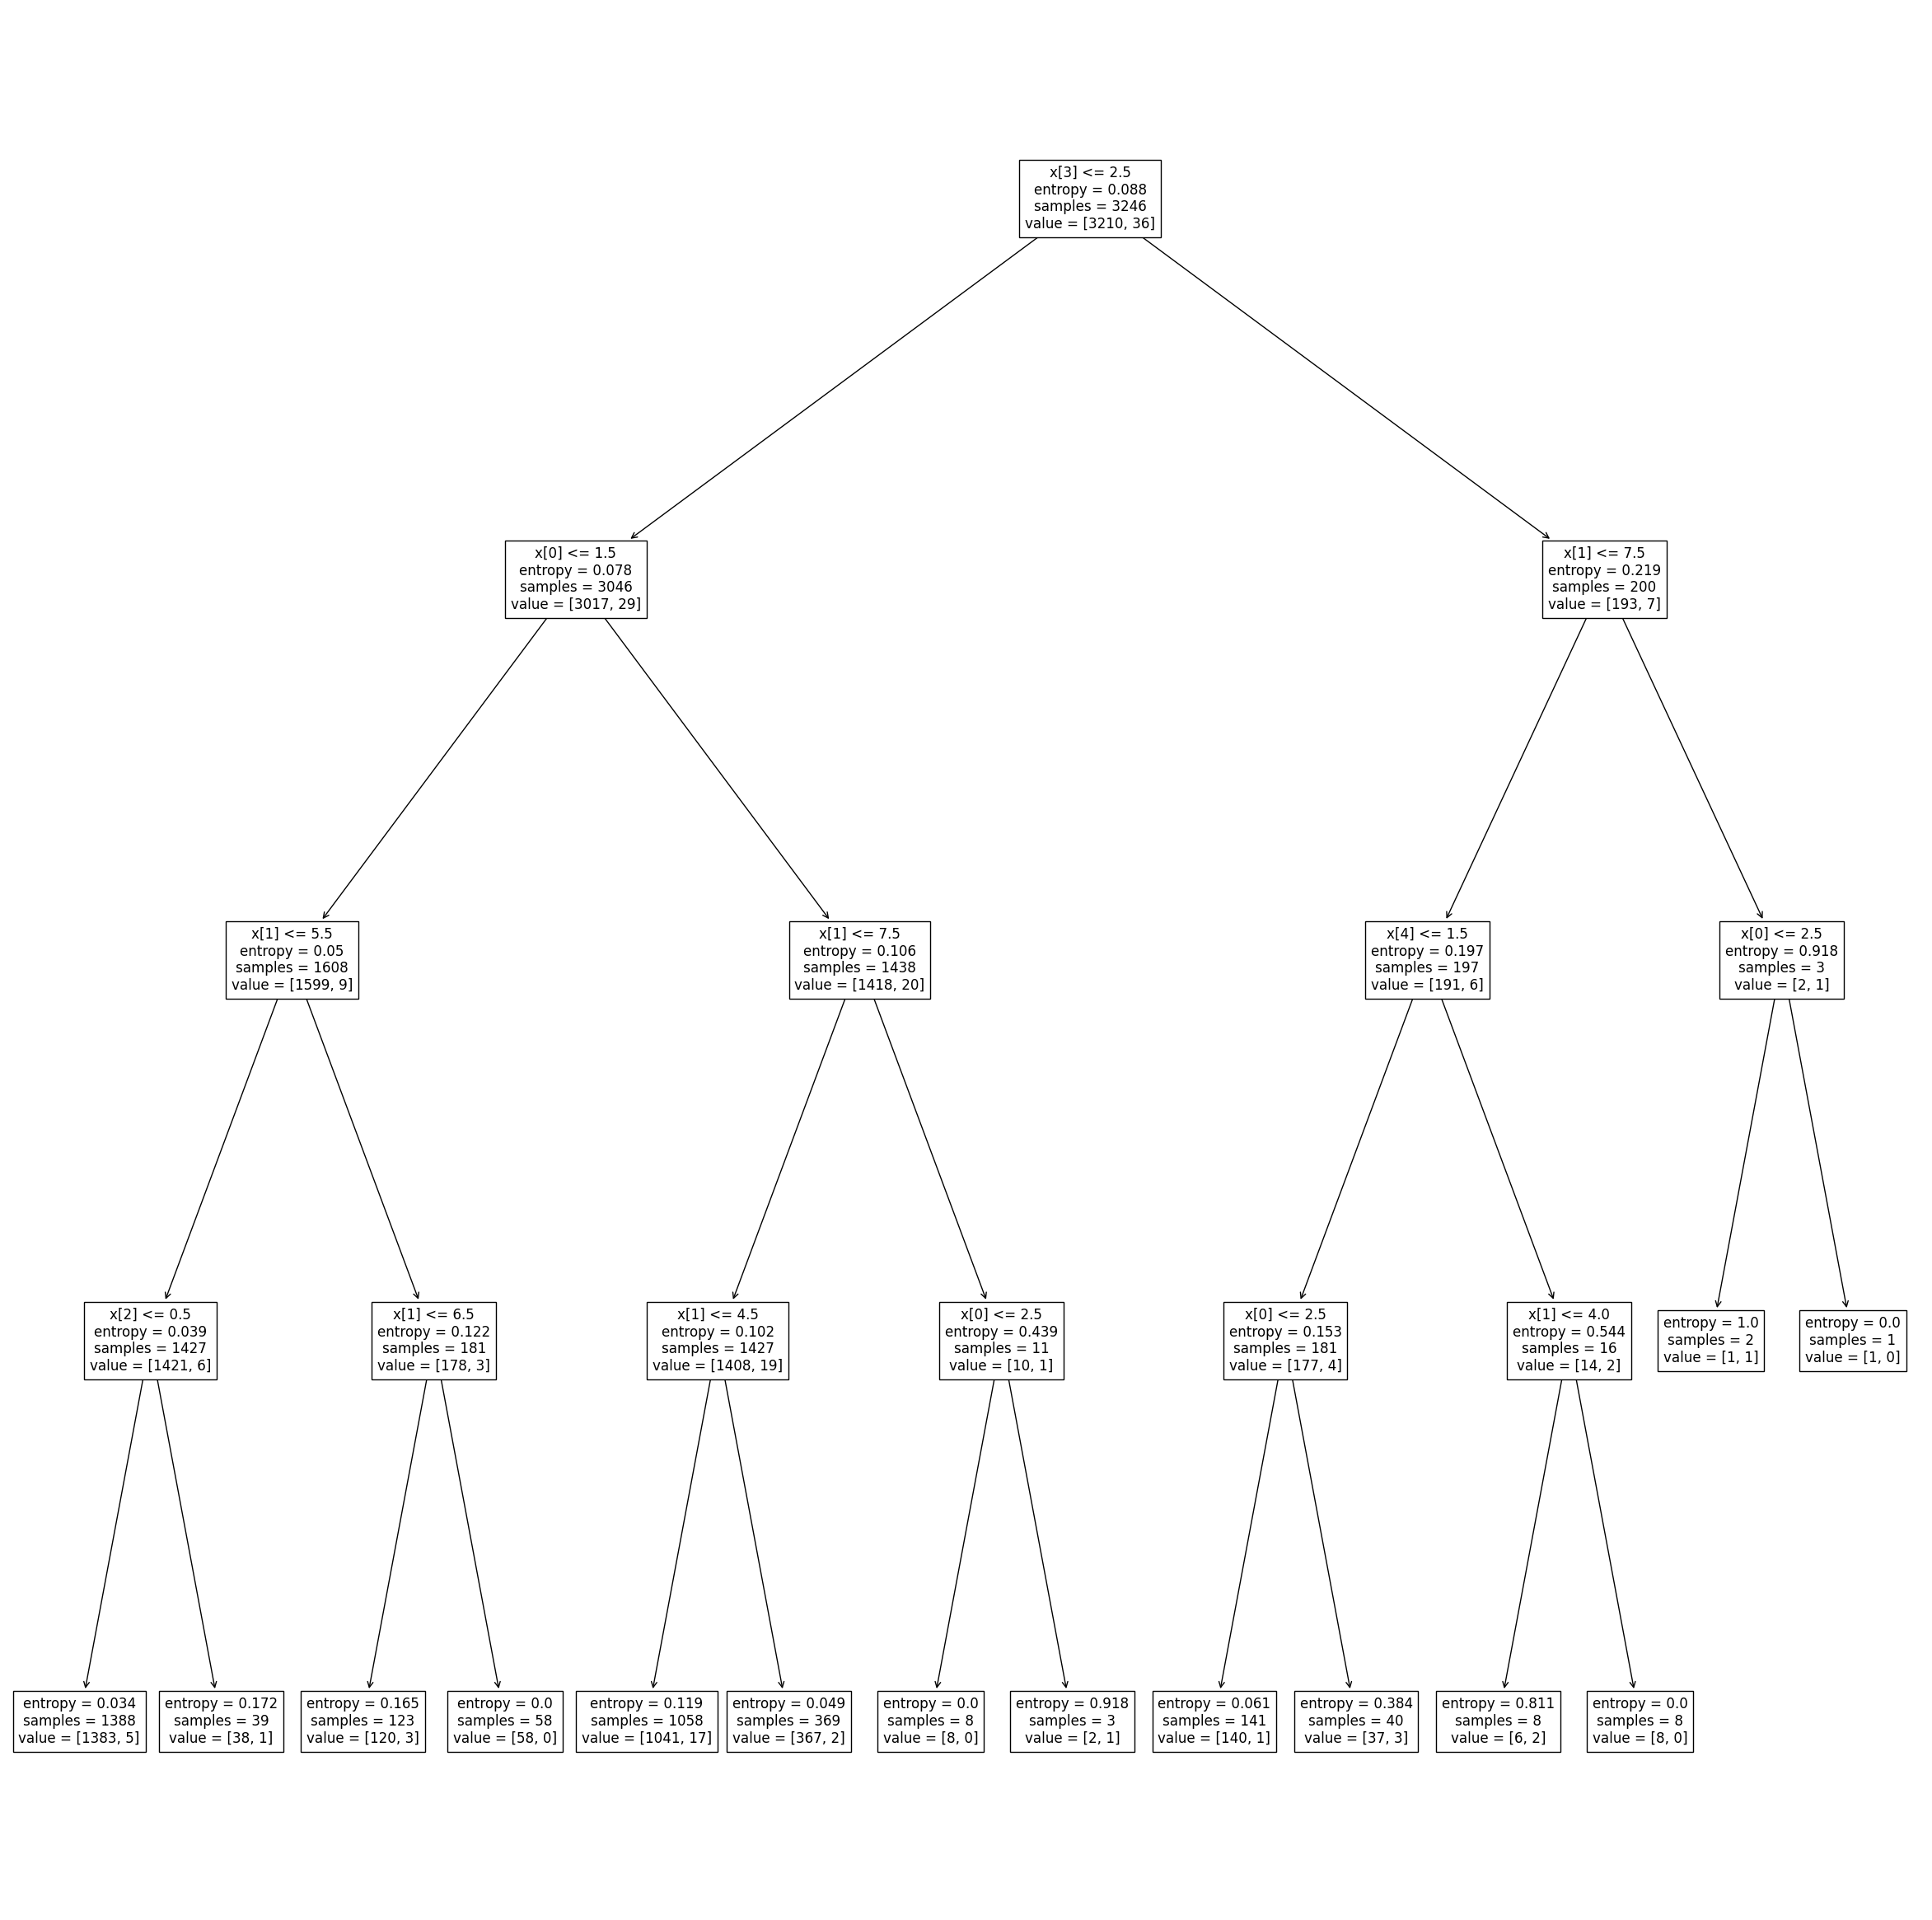

In [246]:
_,ax = plt.subplots(figsize=(30,30))
tree.plot_tree(Dtreeproject);

In [247]:
y_predict = Dtreeproject.predict(X_test)

In [248]:
accuracy_score(y_test, y_predict)

0.9902794653705954